<a href="https://colab.research.google.com/github/erobrien6/OBrien_DSPN_S23/blob/main/Exercise_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 10: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data. 

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [1]:
# WRITE YOUR CODE HERE

df_lexical <- read.csv("/content/LexicalData_withIncorrect.csv")
df_items <- read.csv("/content/Items.csv")

library(tidyverse)
library(dplyr)

head(df_lexical)
head(df_items)

## Join task
df_final <- left_join(df_lexical, df_items, by = c('D_Word' = 'Word'))
# Only include Length and Log_Freq_HAL
df_final <- df_final %>%
  select(c(1:9, 11, 13))

# Drop NAs
nrow(df_final)
df_final <- drop_na(df_final)
nrow(df_final) # Check that drop worked

head(df_final)
summary(df_final)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>
1,1,157,1,1,710,browse,false,-0.437,1
2,2,67,1,1,"1,094",refrigerant,false,0.825,1
3,3,120,1,1,587,gaining,false,-0.645,1
4,4,21,1,1,984,cheerless,false,0.025,1
5,5,236,1,1,577,pattered,false,-0.763,1
6,6,236,2,1,715,conjures,false,-0.364,1


,Occurrences,Word,Length,Freq_HAL,Log_Freq_HAL
,<int>,<chr>,<int>,<chr>,<dbl>
1,1,synergistic,11,284,5.649
2,1,synonymous,10,951,6.858
3,1,syntactical,11,114,4.736
4,1,synthesis,9,"6,742",8.816
5,1,synthesized,11,"2,709",7.904
6,1,synthesizer,11,"1,390",7.237


[1] 74869

[1] 70589

,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Length,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,6,8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,11,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,7,8.304
4,4,21,1,1,984,cheerless,false,0.025,1,9,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,8,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,8,5.268


       X             Sub_ID          Trial            Type       D_RT          
 Min.   :    1   Min.   :  1.0   Min.   :  1.0   Min.   :1   Length:70589      
 1st Qu.:17648   1st Qu.: 76.0   1st Qu.:125.0   1st Qu.:1   Class :character  
 Median :35295   Median :152.0   Median :252.0   Median :1   Mode  :character  
 Mean   :35542   Mean   :151.1   Mean   :250.4   Mean   :1                     
 3rd Qu.:52942   3rd Qu.:226.0   3rd Qu.:376.0   3rd Qu.:1                     
 Max.   :74864   Max.   :300.0   Max.   :500.0   Max.   :1                     
    D_Word            Outlier             D_Zscore          Correct     
 Length:70589       Length:70589       Min.   :-3.0530   Min.   :0.000  
 Class :character   Class :character   1st Qu.:-0.6350   1st Qu.:1.000  
 Mode  :character   Mode  :character   Median :-0.2080   Median :1.000  
                                       Mean   : 0.0836   Mean   :0.887  
                                       3rd Qu.: 0.4770   3rd Qu.:1.000  
  

---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

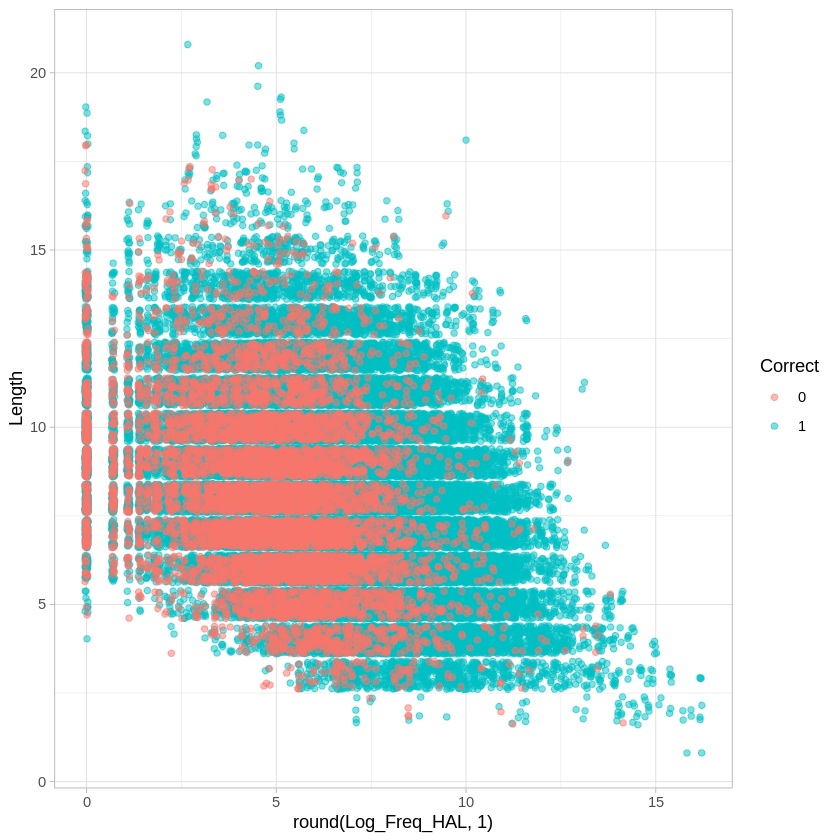

In [2]:
# vrequire(tidyverse) # Load the tidyverse package, if you haven't yet
df_final$Correct <- as.factor(df_final$Correct) # so that R knows that Correct is categorical, not numeric. 

# plot the Correct / Incorrect clusters
ggplot(df_final,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + geom_point(position="jitter",alpha=0.5) + theme_light() 


What do you observe about the "Correct" and "Incorrect" clusters? 

> *The correct and incorrect clusters are overlapping, with the incorrect cluster being visually smaller and less widespread than the correct cluster. Both clusters are distributed in similar directions, although after word length surpasses ~15 units, the observations present are mostly comprised of correct responses. Similarly, after Log_Freq_HAL surpasses 10 units, most of the observations present are correct responses.* 
> 

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [4]:
# WRITE YOUR CODE HERE
# install.packages("ISLR")

library(ISLR)

log_model <- glm(Correct ~ Length + Log_Freq_HAL + Length*Log_Freq_HAL, data=df_final, family=binomial)
summary(log_model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
glm(formula = Correct ~ Length + Log_Freq_HAL + Length * Log_Freq_HAL, 
    family = binomial, data = df_final)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

> *Length and Log_Freq_HAL are both positively associated with the log odds of Correct task answers (B= 0.096; B= 0.309 respectively). In other words, as word length increases by one unit, the log odds of getting the correct answer is increased by 0.096, and as log_freq_hal increases by one unit, the log odds of getting the correct answer is increased by 0.309. The interaction between the predictors is negative (B= -0.011) and significant (p < .001).* 
> 

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [5]:
# WRITE YOUR CODE HERE
glm_prob_df = data.frame(predict(log_model, type = 'response'))
colnames(glm_prob_df) = c('Predicted_Prob')
total_n = nrow(glm_prob_df)
glm_prob_df$index = seq(1, total_n)


df_final$Correct <- as.factor(df_final$Correct)
contrasts(df_final$Correct)

thresh = 0.5

# List of Incorrect
glm_prob_df$predicted_binary=rep("0", total_n)
glm_prob_df$predicted_binary[glm_prob_df$Predicted_Prob>thresh]="1"

# Confusion Matrix
confusion_df = data.frame(glm_prob_df$predicted_binary, df_final$Correct)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)

print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))


,1
0,0
1,1


         actual
predicted     0     1
        0    13    44
        1  7966 62566

[1] "Accuracy: 0.886526229299183"


Did the model do well at predicting lexical decision correctness? Why or why not? 

> *The overall accuracy of the model predicting lexical decision correctness is 0.89, which is relatively strong. However, the confusion matrix indicates that the model had trouble labeling responses as incorrect when they actually were incorrect, instead labeling them as correct (7979 cases), which may be due to setting the threshold at 0.5. The model did a great job at predicting when correct responses were actually correct (62609 cases, only missing 1), which is driving the overall accuracy.*  
> 

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`. 

*Hint: see the Classifiers tutorial.*

In [ ]:
# WRITE YOUR CODE HERE

#install.packages('MASS')
library(MASS)

df_correct <- df_final$Correct

qda_model <- qda(Correct ~ Length + Log_Freq_HAL + Length*Log_Freq_HAL,
                  data = df_final)

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy. 

In [7]:
# WRITE YOUR CODE HERE
qda_correct <- predict(qda_model, df_final)$class

# Confusion Matrix
table(qda_correct, df_correct)
print(paste("Accuracy:",mean(qda_correct==df_correct)))


           df_correct
qda_correct     0     1
          0   455  1647
          1  7524 60963

[1] "Accuracy: 0.870078907478502"


How does QDA prediction performance differ from that of logistic regression?

> *Though the overall prediction accuracies were very comparable (0.89 to 0.87) the QDA did a better job at accurately detecting incorrect responses compared to the logistic regression. Instead of labeling all incorrect responses as correct, the QDA labeled 455 incorrect cases correctly. The QDA also had a comparable performance on labeling correct responses accurately (60963 cases).* 
> 

**DUE:** 5pm EST, March 20, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*